**Nisa Aprilia M** 

**FTDS Batch #004**

In [126]:
# import libraries 
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [127]:
# import data from Kaggle 
df = pd.read_csv(r"C:\Users\nisam\Downloads\covid_19_indonesia_time_series_all.csv")
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


***1) Lakukan hypothesis testing terhadap dataset diatas***

# step 1: Tentukan Hipotesis
H0 = Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09	di Sumatera Selatan = Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09 di Sumatera Utara, 

H1 = Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09 di Sumatera Selatan != Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09 di Sumatera Utara 

# step 2: Data Cleaning

In [145]:
# sort date dalam range yang ditentukan, yaitu 2020-03-23 s/d 2021-07-09
df['Date'] = pd.to_datetime(df['Date'])
start_date = '23-03-2020'
end_date = '09-07-2021'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df1 = df.loc[mask]
df1

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
252,2020-03-23,ID-BA,Bali,0,0,0,0,2,2,1,...,0.00,0.47,100.00%,50.00%,1.00,1.00,NaN,NaN,NaN,NaN
253,2020-03-23,ID-BT,Banten,0,2,3,-5,6,17,210,...,0.19,1.59,283.33%,3500.00%,1.00,1.00,NaN,NaN,NaN,NaN
254,2020-03-23,ID-JK,DKI Jakarta,0,0,0,0,83,41,158,...,0.00,3.78,49.40%,190.36%,0.00,1.00,NaN,NaN,NaN,NaN
255,2020-03-23,ID-YO,Daerah Istimewa Yogyakarta,0,1,0,-1,2,1,133,...,0.28,0.28,50.00%,6650.00%,1.00,NaN,NaN,NaN,NaN,NaN
256,2020-03-23,IDN,Indonesia,65,1,1,63,579,49,30,...,0.00,0.18,8.46%,5.18%,1.02,0.10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,2021-07-09,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,2021-07-09,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,2021-07-09,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,2021-07-09,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [146]:
# sort data yang memuat hanya data untuk Sumatera Selatan
df_sumsel = df1.loc[df['Location'] == 'Sumatera Selatan']
df_sumsel

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
269,2020-03-23,ID-SS,Sumatera Selatan,1,2,0,-1,1,28,27,...,0.24,3.41,2800.00%,2700.00%,NaN,NaN,NaN,NaN,NaN,NaN
288,2020-03-24,ID-SS,Sumatera Selatan,0,0,0,0,1,28,27,...,0.00,3.41,2800.00%,2700.00%,0.00,0.00,NaN,NaN,NaN,NaN
307,2020-03-25,ID-SS,Sumatera Selatan,0,0,0,0,1,28,27,...,0.00,3.41,2800.00%,2700.00%,1.00,1.00,NaN,NaN,NaN,NaN
332,2020-03-26,ID-SS,Sumatera Selatan,0,0,0,0,1,28,27,...,0.00,3.41,2800.00%,2700.00%,1.00,1.00,NaN,NaN,NaN,NaN
358,2020-03-27,ID-SS,Sumatera Selatan,0,0,0,0,1,28,27,...,0.00,3.41,2800.00%,2700.00%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16145,2021-07-05,ID-SS,Sumatera Selatan,172,8,132,32,29897,1522,26428,...,0.97,185.21,5.09%,88.40%,0.70,0.57,NaN,NaN,NaN,NaN
16179,2021-07-06,ID-SS,Sumatera Selatan,255,9,133,113,30152,1531,26561,...,1.10,186.31,5.08%,88.09%,1.48,1.13,NaN,NaN,NaN,NaN
16213,2021-07-07,ID-SS,Sumatera Selatan,358,16,139,203,30510,1547,26700,...,1.95,188.26,5.07%,87.51%,1.40,1.78,NaN,NaN,NaN,NaN
16247,2021-07-08,ID-SS,Sumatera Selatan,296,16,167,113,30806,1563,26867,...,1.95,190.20,5.07%,87.21%,0.83,1.00,NaN,NaN,NaN,NaN


In [147]:
# sort data yang memuat hanya data untuk Sumatera Utara
df_sumut = df1.loc[df['Location'] == 'Sumatera Utara']
df_sumut

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
270,2020-03-23,ID-SU,Sumatera Utara,0,0,0,0,1,2,0,...,0.00,0.13,200.00%,0.00%,1.00,1.00,NaN,NaN,NaN,NaN
289,2020-03-24,ID-SU,Sumatera Utara,0,0,0,0,1,2,0,...,0.00,0.13,200.00%,0.00%,1.00,1.00,NaN,NaN,NaN,NaN
308,2020-03-25,ID-SU,Sumatera Utara,0,0,0,0,1,2,0,...,0.00,0.13,200.00%,0.00%,1.00,1.00,NaN,NaN,NaN,NaN
333,2020-03-26,ID-SU,Sumatera Utara,0,0,0,0,1,2,0,...,0.00,0.13,200.00%,0.00%,1.00,1.00,NaN,NaN,NaN,NaN
359,2020-03-27,ID-SU,Sumatera Utara,0,1,0,-1,1,3,0,...,0.07,0.20,300.00%,0.00%,1.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16146,2021-07-05,ID-SU,Sumatera Utara,136,4,136,-4,36983,1210,32891,...,0.27,81.35,3.27%,88.94%,1.03,0.80,NaN,NaN,NaN,NaN
16180,2021-07-06,ID-SU,Sumatera Utara,256,9,300,-53,37239,1219,33191,...,0.61,81.95,3.27%,89.13%,1.88,2.25,NaN,NaN,NaN,NaN
16214,2021-07-07,ID-SU,Sumatera Utara,190,2,142,46,37429,1221,33333,...,0.13,82.08,3.26%,89.06%,0.74,0.22,NaN,NaN,NaN,NaN
16248,2021-07-08,ID-SU,Sumatera Utara,275,6,199,70,37704,1227,33532,...,0.40,82.49,3.25%,88.93%,1.45,3.00,NaN,NaN,NaN,NaN


In [152]:
# temukan nilai mean dari New Cases sumsel dan sumut 
nc_mean_sumsel = df_sumsel['New Cases'].mean()
nc_mean_sumut = df_sumut['New Cases'].mean()
print('Rata-rata New Cases Sumatera Selatan:', nc_mean_sumsel)
print('Rata-rata New Cases Sumatera Utara:', nc_mean_sumut)

Rata-rata New Cases Sumatera Selatan: 65.71097046413502
Rata-rata New Cases Sumatera Utara: 80.25105485232068


# step 3: Pembuktian H0 dengan Two-Sample Independent Test

***Temukan tipe data untuk menentukan tipe testing***

-Variable 1 nya adalah rata-rata angka new cases Sulawesi Selatan pada range tanggal 2020-03-23 s/d 2021-07-09

-Variable 2 nya adalah rata2 angka new cases Sulawesi Barat pada range tanggal 2020-03-23 s/d 2021-07-09

Kedua variable ini tergolong sebagai **independent data**.

In [154]:
# temukan p-value 
t,p=stats.ttest_ind(df_sumsel['New Cases'],df_sumut['New Cases'])
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

t-statistic:-4.3833245868684045
p-value:1.2996796353683237e-05


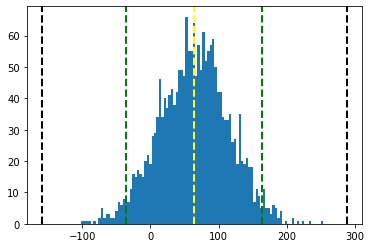

In [155]:
# buat plot
pop=np.random.normal(df_sumsel['New Cases'].mean(), df_sumut['New Cases'].std(), 2000)
ci = stats.norm.interval(0.95, pop.mean(), pop.std())
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()+t*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean()-t*pop.std(), color='black', linestyle='dashed', linewidth=2)

# step 4: Buat Kesimpulan Analisa

***2) Ambil kesimpulan dari hasil analisa.***


Berdasarkan hasil analisa, dimana: 

p-value = 1.2996796353683237e-05, dan 
c-value = 0.05 

Maka, p-value > c-value, dimana ini berarti H0 dapat diterima 

Kesimpulannya, dapat dikatakan bahwa:

***Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09 di Sumatera Selatan sama dengan/mirip dengan Rata-rata New Cases dari 2020-03-23 s/d 2021-07-09 di Sumatera Utara***